### ATSC 405
### Carnot problem for Wednesday 30th March 2016

#### H Thompson

0.0137843352661


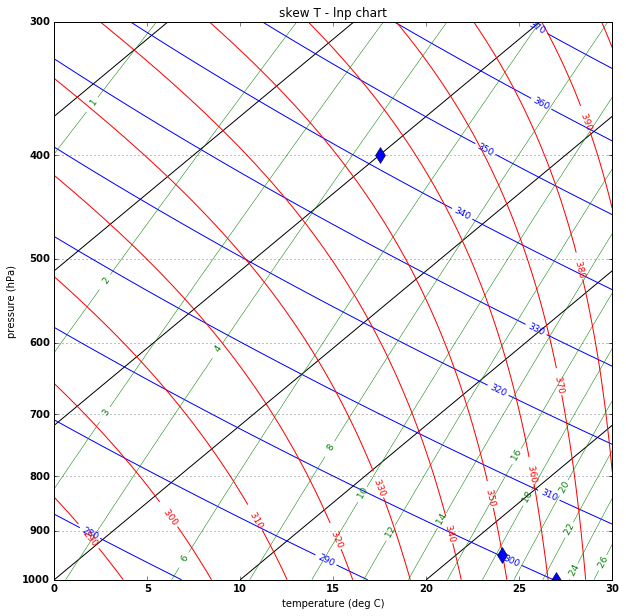

In [14]:
# import modules & functions; set matlibplot to plot inline
from a405skewT.makeSkewII import makeSkewWet
from a405thermo.thermlib import find_rsat 
from a405thermo.thermlib import find_lcl
from a405thermo.thermlib import tinvert_rsat
from a405thermo.thermlib import convertTempToSkew
from a405thermo.thermlib import find_thetaes
from a405thermo.thermlib import tinvert_thetae
%matplotlib inline

# initial parameters
temp_1 = 300   # K
press_1 = 1000   # hPa
RH = 0.8

# finding initial mixing ratios and dew point temp
rsat_1 = find_rsat(temp_1, press_1*1e2)
mixing_r_1 = rsat_1 * RH
dew_temp_1 = tinvert_rsat(1,mixing_r_1,press_1)

# finding the first lifting condensation level
lcl_1_temp, lcl_1_press = find_lcl(dew_temp_1, temp_1, press_1*1e2)
lcl_1_press = lcl_1_press * 0.01

# entropy during adaibatic ascent should remain constant
thetaes_1 = find_thetaes(lcl_1_temp,lcl_1_press*1.e2)

# determining temp at 400 hPa using the constant entropy
press_2 = 400      # hPa
#mixing_r_2 = 0.2 * mixing_r_1
temp_2, rv_400, rl_400 = tinvert_thetae(thetaes_1, mixing_r_1, press_2*1.e2)

# plotting each point on skew T - ln P plot as a blue diamond 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax, skew = makeSkewWet(ax, corners=[0,30])
ax.set(ylim=[1000, 300])

xplot = convertTempToSkew(temp_1-273., press_1, skew)
dot = ax.plot(xplot,press_1, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(lcl_1_temp-273., lcl_1_press, skew)
dot = ax.plot(xplot, lcl_1_press, 'bd', markersize=12, markerfacecolor='b')

xplot = convertTempToSkew(temp_2-273., press_2, skew)
dot = ax.plot(xplot, press_2, 'bd', markersize=12, markerfacecolor='b')